# Verteilung der Aufenthaltsdauer in Zuständen der Simulation

### Zustände

* Zuhause -> 1
* Arbeit -> 2 
* Einkaufen -> 3 
* Freizeit -> 4
* Sonstiges -> 5

In [4]:
import pandas as pd
import numpy as np 
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [8]:
df = pickle.load(open(r"C:\Users\thoma\Desktop\ev-modelling-repo\Simulationsauswertung\Simulationsergebnisse\Simulation_Results_2_500k.pickle", "rb"))

In [9]:
df = df.rename(str.capitalize, axis='columns')

In [10]:
filt = df["Whyto"] == 1
aufenthalt_zuhause = df[filt]["Stay_duration"]
filt = df["Whyto"] == 2
aufenthalt_arbeit = df[filt]["Stay_duration"]
filt = df["Whyto"] == 3
aufenthalt_einkaufen = df[filt]["Stay_duration"]
filt = df["Whyto"] == 4
aufenthalt_freizeit = df[filt]["Stay_duration"]
filt = df["Whyto"] == 5
aufenthalt_sonstiges = df[filt]["Stay_duration"]

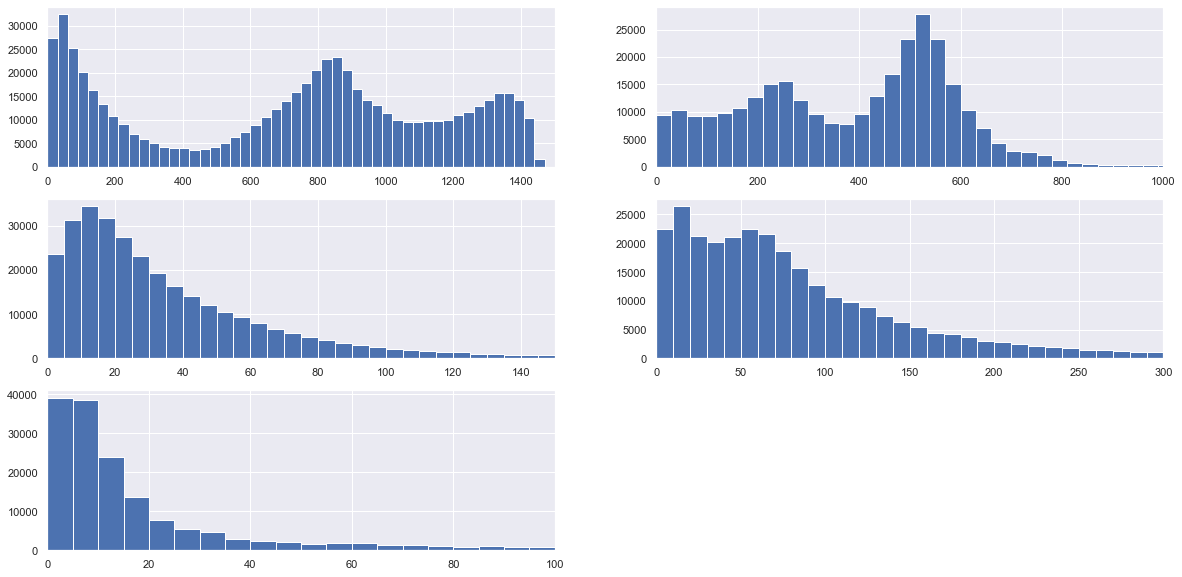

In [11]:
sns.set()
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20,10))
ax1.hist(aufenthalt_zuhause, bins=range(int(min(aufenthalt_zuhause)), int(max(aufenthalt_zuhause)), 30));
ax1.set_xlim([0, 1500])
ax2.hist(aufenthalt_arbeit, bins=range(int(min(aufenthalt_arbeit)), int(max(aufenthalt_arbeit)), 30));
ax2.set_xlim([0,1000])
ax3.hist(aufenthalt_einkaufen, bins=range(int(min(aufenthalt_einkaufen)), int(max(aufenthalt_einkaufen)), 5));
ax3.set_xlim([0,150])
ax4.hist(aufenthalt_freizeit, bins=range(int(min(aufenthalt_freizeit)), int(max(aufenthalt_freizeit)), 10));
ax4.set_xlim([0,300])
ax5.hist(aufenthalt_sonstiges, bins=range(int(min(aufenthalt_sonstiges)), int(max(aufenthalt_sonstiges)), 5));
ax5.set_xlim([0,100])
fig.delaxes(ax6)

## Verteilungsfunktion über Density Estimation Modell

In [12]:
from sklearn.neighbors import KernelDensity

In [13]:
# Erstellen Kernel Density Estimation Modell Zuhause 
kde_model_zuhause = KernelDensity(bandwidth=13)
kde_model_zuhause.fit(aufenthalt_zuhause[:, np.newaxis])
# übertragen in visaulisierbare Wahrscheinlichkeitsdichtefunktion
x = np.linspace(-50, max(aufenthalt_zuhause), 1000)
log_pdf = kde_model_zuhause.score_samples(x[:, np.newaxis])
kde_zuhause_pdf = np.exp(log_pdf)

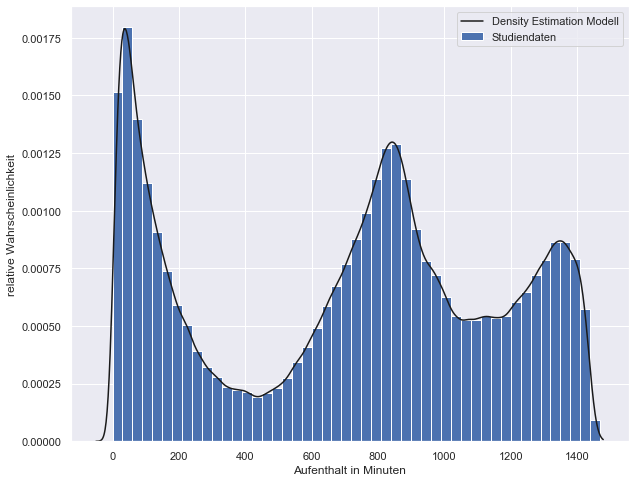

In [14]:
plt.figure(figsize=(10,8))
plt.hist(aufenthalt_zuhause, bins=range(int(min(aufenthalt_zuhause)), int(max(aufenthalt_zuhause)), 30), density=True);
plt.plot(x, kde_zuhause_pdf, '-k');
labels = ["Density Estimation Modell", "Studiendaten"]
plt.legend(labels);
plt.xlabel("Aufenthalt in Minuten");
plt.ylabel("relative Wahrscheinlichkeit");

In [15]:
# Erstellen Kernel Density Estimation Modell Arbeit 
kde_model_arbeit = KernelDensity(bandwidth=18)
kde_model_arbeit.fit(aufenthalt_arbeit[:, np.newaxis])
# übertragen in visaulisierbare Wahrscheinlichkeitsdichtefunktion
x = np.linspace(-50, max(aufenthalt_arbeit), 1000)
log_pdf = kde_model_arbeit.score_samples(x[:, np.newaxis])
kde_arbeit_pdf = np.exp(log_pdf)

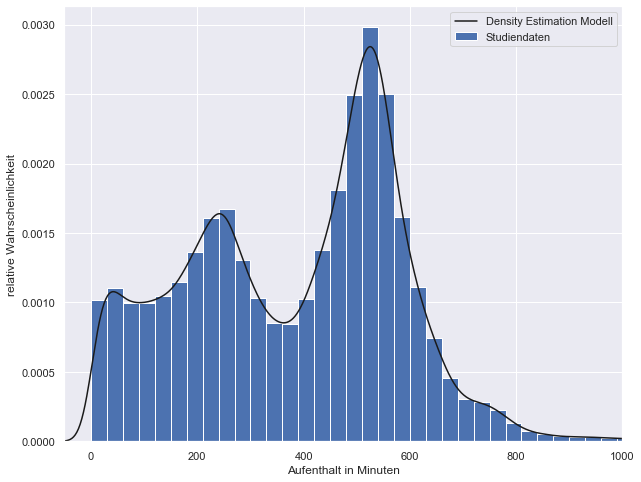

In [16]:
plt.figure(figsize=(10,8))
plt.hist(aufenthalt_arbeit, bins=range(int(min(aufenthalt_arbeit)), int(max(aufenthalt_arbeit)), 30), density=True);
plt.plot(x, kde_arbeit_pdf, '-k');
labels = ["Density Estimation Modell", "Studiendaten"]
plt.legend(labels);
plt.gca().set_xlim(-50, 1000)
plt.xlabel("Aufenthalt in Minuten");
plt.ylabel("relative Wahrscheinlichkeit");

In [17]:
# Erstellen Kernel Density Estimation Modell Einkaufen 
kde_model_einkaufen = KernelDensity(bandwidth=8)
kde_model_einkaufen.fit(aufenthalt_einkaufen[:, np.newaxis])
# übertragen in visaulisierbare Wahrscheinlichkeitsdichtefunktion
x = np.linspace(-50, max(aufenthalt_einkaufen), 1000)
log_pdf = kde_model_einkaufen.score_samples(x[:, np.newaxis])
kde_einkaufen_pdf = np.exp(log_pdf)

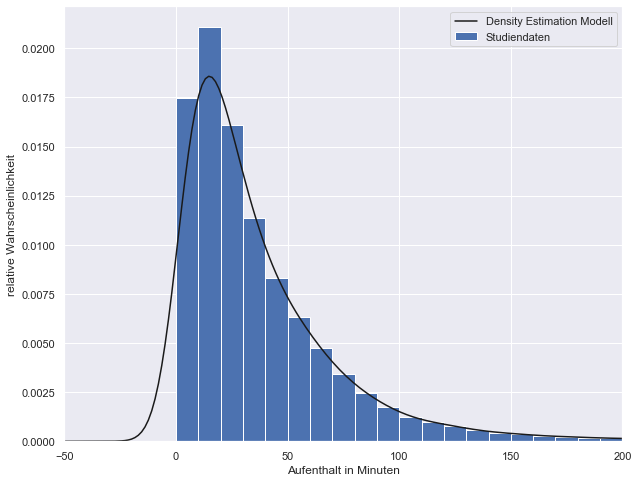

In [18]:
plt.figure(figsize=(10,8))
plt.hist(aufenthalt_einkaufen, bins=range(int(min(aufenthalt_einkaufen)), int(max(aufenthalt_einkaufen)), 10), density=True);
plt.plot(x, kde_einkaufen_pdf, '-k');
labels = ["Density Estimation Modell", "Studiendaten"]
plt.legend(labels);
plt.gca().set_xlim(-50, 200)
plt.xlabel("Aufenthalt in Minuten");
plt.ylabel("relative Wahrscheinlichkeit");

In [19]:
# Erstellen Kernel Density Estimation Modell Freizeit
kde_model_freizeit = KernelDensity(bandwidth=8)
kde_model_freizeit.fit(aufenthalt_freizeit[:, np.newaxis])
# übertragen in visaulisierbare Wahrscheinlichkeitsdichtefunktion
x = np.linspace(-50, max(aufenthalt_freizeit), 1000)
log_pdf = kde_model_freizeit.score_samples(x[:, np.newaxis])
kde_freizeit_pdf = np.exp(log_pdf)

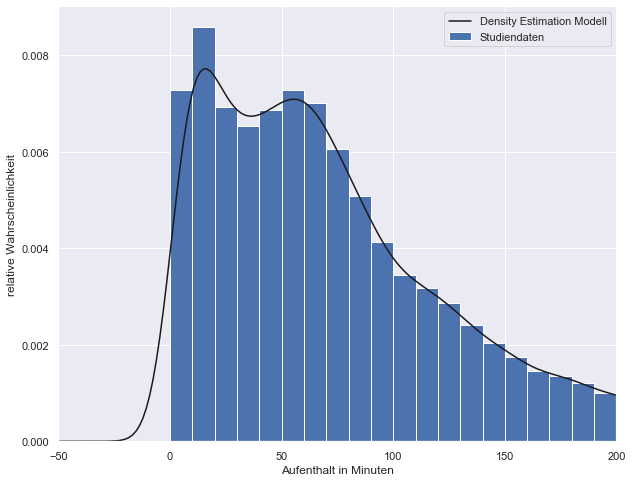

In [20]:
plt.figure(figsize=(10,8))
plt.hist(aufenthalt_freizeit, bins=range(int(min(aufenthalt_freizeit)), int(max(aufenthalt_freizeit)), 10), density=True);
plt.plot(x, kde_freizeit_pdf, '-k');
labels = ["Density Estimation Modell", "Studiendaten"]
plt.legend(labels);
plt.gca().set_xlim(-50, 200)
plt.xlabel("Aufenthalt in Minuten");
plt.ylabel("relative Wahrscheinlichkeit");

In [21]:
# Erstellen Kernel Density Estimation Modell Sonstiges
kde_model_sonstiges = KernelDensity(bandwidth=2)
kde_model_sonstiges.fit(aufenthalt_sonstiges[:, np.newaxis])
# übertragen in visaulisierbare Wahrscheinlichkeitsdichtefunktion
x = np.linspace(-50, max(aufenthalt_sonstiges), 1000)
log_pdf = kde_model_sonstiges.score_samples(x[:, np.newaxis])
kde_sonstiges_pdf = np.exp(log_pdf)

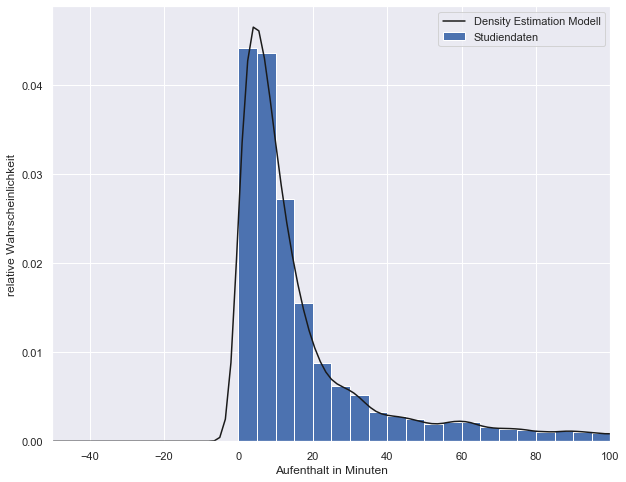

In [22]:
plt.figure(figsize=(10,8))
plt.hist(aufenthalt_sonstiges, bins=range(int(min(aufenthalt_sonstiges)), int(max(aufenthalt_sonstiges)), 5), density=True);
plt.plot(x, kde_sonstiges_pdf, '-k');
labels = ["Density Estimation Modell", "Studiendaten"]
plt.legend(labels);
plt.gca().set_xlim(-50, 100)
plt.xlabel("Aufenthalt in Minuten");
plt.ylabel("relative Wahrscheinlichkeit");

## Lognormal Verteilung für Sonstiges